<a href="https://colab.research.google.com/github/Humoyun1803/next_word_predict/blob/main/sozbashorati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install python3.9

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libpython3.9-minimal libpython3.9-stdlib python3.9-minimal
Suggested packages:
  python3.9-venv binfmt-support
The following NEW packages will be installed:
  libpython3.9-minimal libpython3.9-stdlib python3.9 python3.9-minimal
0 upgraded, 4 newly installed, 0 to remove and 4 not upgraded.
Need to get 4,917 kB of archives.
After this operation, 19.1 MB of additional disk space will be used.
Get:1 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic/main amd64 libpython3.9-minimal amd64 3.9.15-1+bionic1 [805 kB]
Get:2 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic/main amd64 python3.9-minimal amd64 3.9.15-1+bionic1 [1,938 kB]
Get:3 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic/main amd

In [1]:
!python --version

Python 3.7.15


In [2]:
!pip install tensorflow 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:


import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os
import pandas as pd
import os
import numpy as np


In [6]:
# path = '/content/1661-0.txt'
# text = open(path).read().lower()
# print('length of the corpus is: :', len(text))

In [8]:
from google.colab import files
upload = files.upload()

Saving 1661-0.txt to 1661-0.txt


In [9]:
file = open("1661-0.txt", "r", encoding = "utf8")

lines = []
for i in file:
  lines.append(i)

data = ""
for i in lines:
  data = ' '. join(lines)


data = data.replace('\n',' ').replace('\r','').replace('\ufeff','').replace('“','').replace('”','')


data = data.split()
data = ' '.join(data)
data[:500]

"Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.net Title: The Adventures of Sherlock Holmes Author: Arthur Conan Doyle Release Date: November 29, 2002 [EBook #1661] Last Updated: May 20, 2019 Language: English Character set en"

In [10]:
len(data)

573660

In [11]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

pickle.dump(tokenizer,open('token.pkl','wb'))

ketmaket_data = tokenizer.texts_to_sequences([data])[0]
ketmaket_data[:15]

[142, 4680, 1, 986, 5, 125, 33, 46, 556, 2164, 2165, 27, 987, 14, 22]

In [12]:
len(ketmaket_data)

108958

In [13]:
vocab_size = len(tokenizer.word_index)+1
print(vocab_size)

8624


In [14]:
ketmaketliklar = []

for i in range(3, len(ketmaket_data)):
  words = ketmaket_data[i-3:i+1]
  ketmaketliklar.append(words)




print("Ketma-ketlik uzunligi: ", len(ketmaketliklar))
ketmaketliklar = np.array(ketmaketliklar)
ketmaketliklar[:10]

Ketma-ketlik uzunligi:  108955


array([[ 142, 4680,    1,  986],
       [4680,    1,  986,    5],
       [   1,  986,    5,  125],
       [ 986,    5,  125,   33],
       [   5,  125,   33,   46],
       [ 125,   33,   46,  556],
       [  33,   46,  556, 2164],
       [  46,  556, 2164, 2165],
       [ 556, 2164, 2165,   27],
       [2164, 2165,   27,  987]])

In [15]:
X = []
y = []
for i in ketmaketliklar:
  X.append(i[0:3])
  y.append(i[3])
X = np.array(X)
y = np.array(y)

In [16]:
print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[ 142 4680    1]
 [4680    1  986]
 [   1  986    5]
 [ 986    5  125]
 [   5  125   33]
 [ 125   33   46]
 [  33   46  556]
 [  46  556 2164]
 [ 556 2164 2165]
 [2164 2165   27]]
Response:  [ 986    5  125   33   46  556 2164 2165   27  987]


In [17]:
y = to_categorical(y, num_classes = vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

#Model yaratamiz

In [18]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation = "relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             86240     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 8624)              8632624   
                                                                 
Total params: 21,767,864
Trainable params: 21,767,864
Non-trainable params: 0
_________________________________________________________________


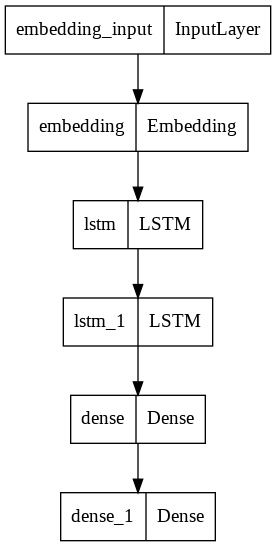

In [20]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model


keras.utils.plot_model(model, to_file = 'plot.png', show_layer_names = True)

In [21]:
# from tensorflow.keras.callbacks import ModelCheckpoint

# checkpoint = ModelCheckpoint("next_words.h5", monitor = 'loss', verbose = 1, save_best_only = True)
# model.compile(loss = "categorical_crossentropy", optimizer=Adam(learning_rate = 0.001))
# model.fit(X,y, epochs = 70, batch_size=64, callbacks = [checkpoint])

In [27]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):


  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""

  for key, value in tokenizer.word_index.items():

    if value == preds:
      predicted_word = key
      break


  print(predicted_word)
  return predicted_word

In [26]:
#Humoyun Abduqodirov

In [ ]:
while(True):
  text = input("Qatoringizni kiriting:")

  if text == "0":
    print("Bajarish tugallandi")
    break
  
  else:

      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)

          Predict_Next_Words(model,tokenizer,text)

      except Exception as e:
        print("Xatolik yuz berdi: ",e)
        continue

Qatoringizni kiriting:PROJECT GUTENBERG EBOOK
['PROJECT', 'GUTENBERG', 'EBOOK']
1/1 [==============================] - 5s 5s/step
stripes
Qatoringizni kiriting:by an anonymous 
['an', 'anonymous', '']
1/1 [==============================] - 1s 634ms/step
protection
